In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def template_matching_ssd_with_stride(image, template, stride=1):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    template_height, template_width = gray_template.shape
    result = np.zeros((gray_image.shape[0] - template_height + 1, gray_image.shape[1] - template_width + 1))

    # Slide the template over the image with the given stride
    for y in range(0, gray_image.shape[0] - template_height + 1, stride):
        for x in range(0, gray_image.shape[1] - template_width + 1, stride):
            window = gray_image[y:y+template_height, x:x+template_width]
            # Calculate the SSD and store it in the result matrix
            ssd = np.sum((window - gray_template) ** 2)
            result[y, x] = ssd

    # Find the location with the minimum SSD
    min_val, _, min_loc, _ = cv2.minMaxLoc(result)
    top_left = max_loc
    bottom_right = (top_left[0] + template_width, top_left[1] + template_height)

    # Draw a rectangle around the best match
    cv2.rectangle(image, top_left, bottom_right, 255, 2)
    return image

In [36]:
def template_matching_normalized_correlation(image, template, threshold = 0.9):
    # Convert images to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    # Apply template matching
    result = cv2.matchTemplate(gray_image, gray_template, cv2.TM_CCORR_NORMED)

    # Find the location with the maximum normalized correlation
    _, max_val, _, max_loc = cv2.minMaxLoc(result)

    if max_val < threshold:
        return None

    top_left = max_loc
    template_height, template_width = gray_template.shape
    bottom_right = (top_left[0] + template_width, top_left[1] + template_height)

    # Draw a rectangle around the best match
    cv2.rectangle(image, top_left, bottom_right, 255, 2)

    return image

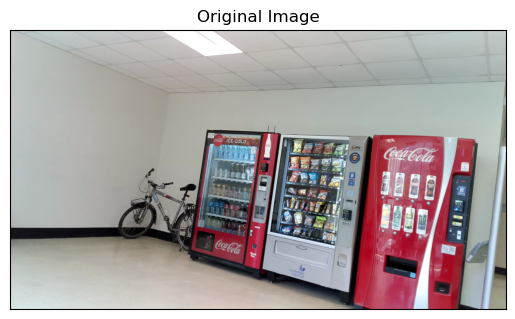

In [35]:
# Load the images
image = cv2.imread('./cropped_frames/original_image.jpg')
# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.title('Original Image'),plt.xticks([]), plt.yticks([])
plt.show()

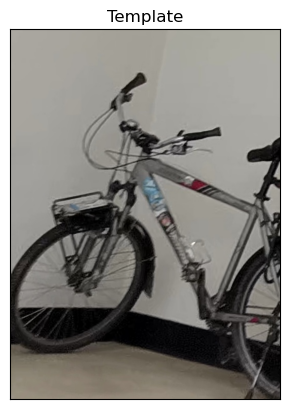

In [11]:
template = cv2.imread('./cropped_frames/bicycle.jpg')
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(template_rgb)
plt.title('Template'),plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
# ssd_mapping = sum_of_square_differences_opencv(image, template)

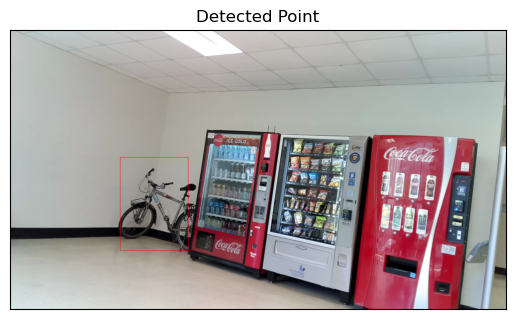

In [8]:
# Perform template matching
template_matching_normalized_correlation(image_rgb, template)
plt.imshow(image_rgb,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

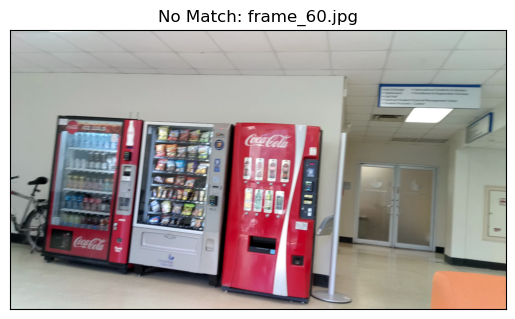

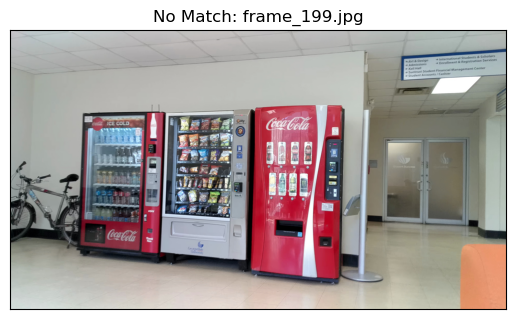

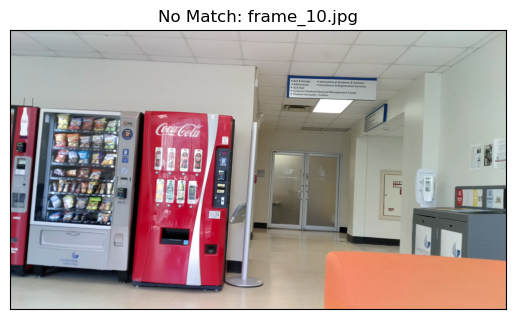

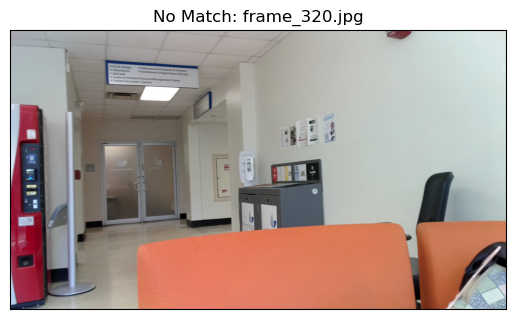

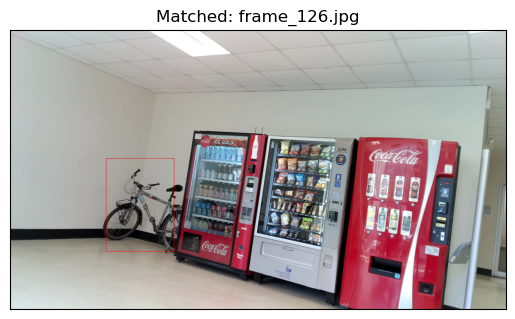

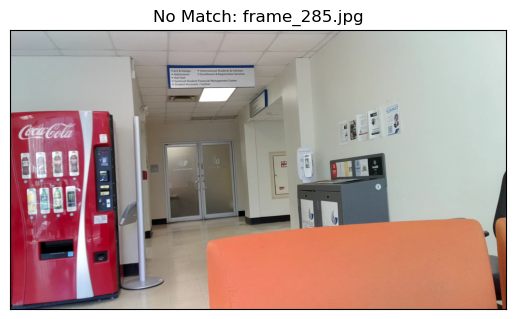

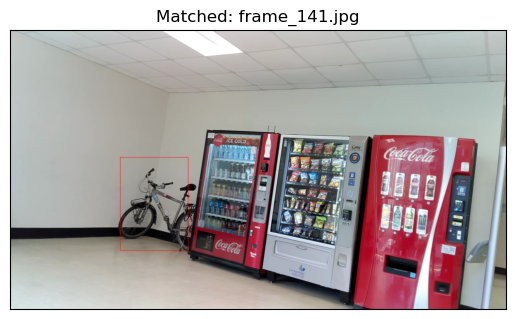

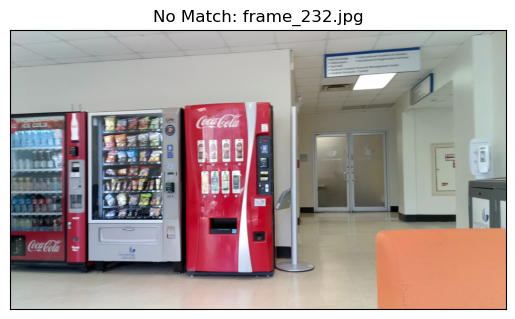

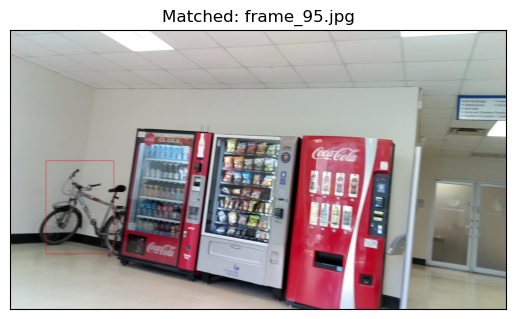

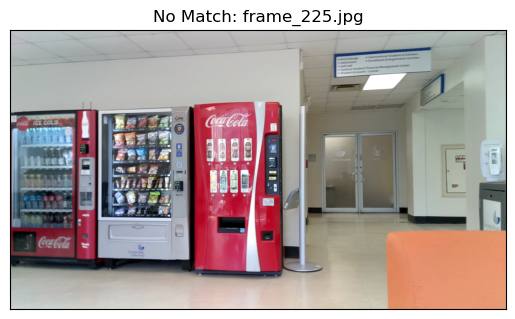

In [39]:
# Template matching for all images in dataset
folder_path = './comparison_dataset'
count = 0 
# Iterate through all the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):  # Check for JPEG images
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if img_rgb is not None:
            res = template_matching_normalized_correlation(img_rgb, template, 0.95)
            # Display the result
            if res is not None:
                plt.imshow(img_rgb, cmap = 'gray')
                plt.title(f'Matched: {filename}'), plt.xticks([]), plt.yticks([])
                plt.show()
            else:
                plt.imshow(img_rgb, cmap = 'gray')
                plt.title(f'No Match: {filename}'), plt.xticks([]), plt.yticks([])
                plt.show()
                count += 1
                

In [17]:
count

10